In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

DATASETS = ['ocr', 'ner']
SAMPLING = ['gap']

In [2]:
d = '../logs/'
directories = [os.path.join(d, o) for o in os.listdir(d) if os.path.isdir(os.path.join(d,o))]

In [3]:
idx = np.array([False for _ in range(len(directories))])
for d in DATASETS:
    idx += [d in directories[i] for i in range(len(directories))]

In [4]:
for i in np.where(idx)[0]:
    for s in SAMPLING:
        d = directories[i]
        files = [os.path.join(d, o) for o in os.listdir(d) if os.path.isdir(os.path.join(d,o))]
        idx = [s in files[i] for i in range(len(files))]
        idx = np.where(idx)[0]
        idx = idx.astype(int)
        if len(idx) > 0:
            import pdb; pdb.set_trace()
            print(files[idx])

> <ipython-input-4-ce0ef3da8634>(10)<module>()
-> print(files[idx])
(Pdb) q


BdbQuit: 

In [5]:
directories

['../logs/ocr_n100',
 '../logs/conll_n100',
 '../logs/pos_n100',
 '../logs/ner_full',
 '../logs/ner_n100',
 '../logs/ocr_full',
 '../logs/pos_full',
 '../logs/conll_full']

In [37]:
t = '../logs/ocr_full/20180305_185040_gap0.8_lscustom.pickle'

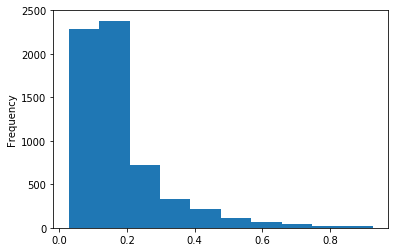

In [45]:
step = np.load(t)
step = pd.DataFrame(step, columns=['indice', 'step_size'])
step_stats = step.loc[step['step_size'] > 0].groupby('indice')['step_size'].agg(['count', 'mean', 'std'])
step_stats['mean'].plot.hist()

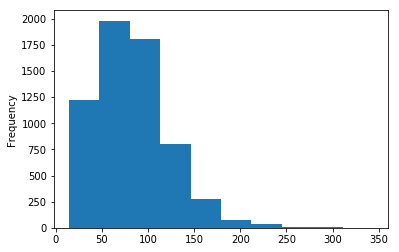

In [46]:
step_stats['count'].plot.hist()

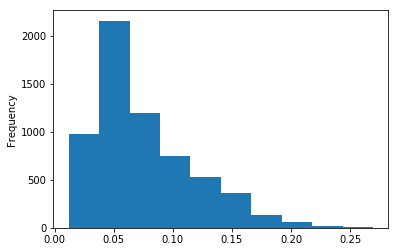

In [49]:
step_stats['std'].plot.hist()

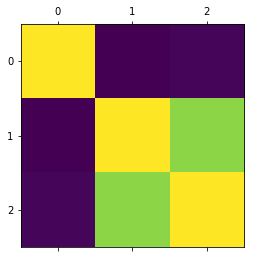

In [47]:
plt.matshow(step_stats.corr())

In [48]:
step_stats.corr()

,count,mean,std
count,1.000000,-0.713696,-0.684054
mean,-0.713696,1.000000,0.702987
std,-0.684054,0.702987,1.000000
